# Nitrous hole sizing

## Introduction
This document is primarily to size the orrifaces for the Sunride SFIII liquid engine. The analysis focuses largely on the unique properties in particular of nitrous oxide, $N_2O$, the selected oxidiser. 

### Nitrous Oxide and Self-Pressurisation
Nitrous oxide, is a commonly used oxidiser for small to medium size liquid rocket propulsion systems as a non-toxic, non-cryogenic propellant. Whilst nitrous oxide is less oxidising and lower performance than LOx, its ease of handling and storage offer considerable advantages.

Nitrous oxide exists in vapor-liquid equilibrium for typical ambient temperatures. For a vapor liquid equilibrium (vertical regions on the interactive figures below), The pressure and temperature are fixed. Any work or heat transfer that occurs will simply act to change the ratio of the two phases. This ratio is often referred to as the quality of the system.

Below, you can see how how the equilbrium may be shifted by:

1) **Heat, $Q_{in}$**: heat into the two phase system shifts equilibrium towards the vapor phase _without changing the temperature_
2) **Work, $W_{in}$**: compressive work forces the equilibrium to produce more of the liquid phase _without changing the pressure_
3) **Mass, $m$**: for a fixed volume, mass into the system forces the equilibrium to produce more of the liquid phase _without changing the pressure_
4) **Volume, $V$**: for a fixed mass, increasing the volume of the systems forces the equilibrium to shift towards more vapor phase

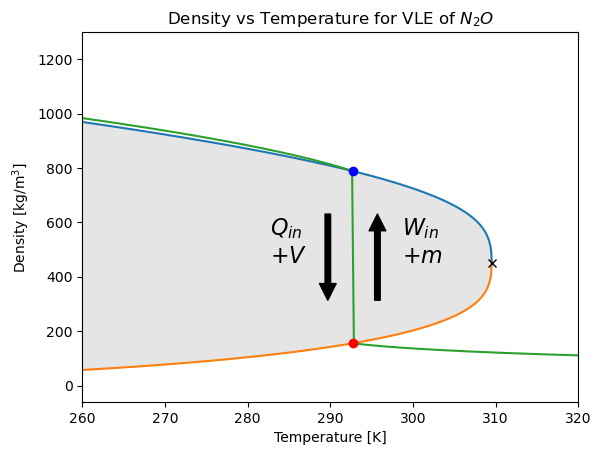

In [1]:
from diagrams import VLE_diagram
VLE_diagram()

### Self pressurisation of $N_2O$ 
Because of this property of VLE, propellant tanks of nitrous oxide have a unique ability to maintain a relatively constant pressure for a given ambient temperature. This is highly useful property enables nitrous oxide to 'self pressurise', reducing the need for another pressurant tank

### Temperature dependancy of density
As shown in Figure 2.a, an issue with 

In [1]:
import ipywidgets as widgets
from IPython.display import display
from NitrousDensityPlots import density_sliders, plot_curves

isoT_slider, isoP_slider = density_sliders()
widgets.interactive(plot_curves, isoT=isoT_slider, isoP=isoP_slider)

interactive(children=(FloatSlider(value=15.0, continuous_update=False, description='Tsat (°C)', max=60.0, min=…

In [2]:
from NitrousEnthalpyPlots import enthalpy_sliders, plot_enthalpies
isoT_slider, isoP_slider = enthalpy_sliders()
widgets.interactive(plot_enthalpies, isoT=isoT_slider, isoP=isoP_slider)

interactive(children=(FloatSlider(value=15.0, continuous_update=False, description='Tsat (°C)', max=60.0, min=…

## Models

### 1. Single-Phase Incompressible (SPI) Liquid Flow:
**key assumptions:**
* **Liquid only:** no vapor phase
* **Incompressible:** density is constant

It is an adequate assumption to assume that most liquid propellants are incompressible since the density of the liquid is much greater than the density of the vapor phase.

$$
\dot{m}_{SPI} = Q \rho_{l} = C_d A \sqrt{ 
\frac
{2 \rho \Delta P}
{1 - \left( \frac{A}{A_1} \right)^2}
}
$$

Which for straight channels reduces to:

$$
\dot{m}_{SPI} = Q \rho_{l} = C_d A \sqrt{
{2 \rho \Delta P}
}
$$

where:
* $\dot{m}_{SPI}$ is the mass flow rate of the liquid
* $Q$ is the volumetric flow rate of the liquid
* $\rho_{l}$ is the density of the liquid
* $C_d$ is the discharge coefficient
* $A$ is the area of the injector orifice
* $A_1$ is the upstream cross-sectional area
* $\Delta P$ is the pressure drop across the injector

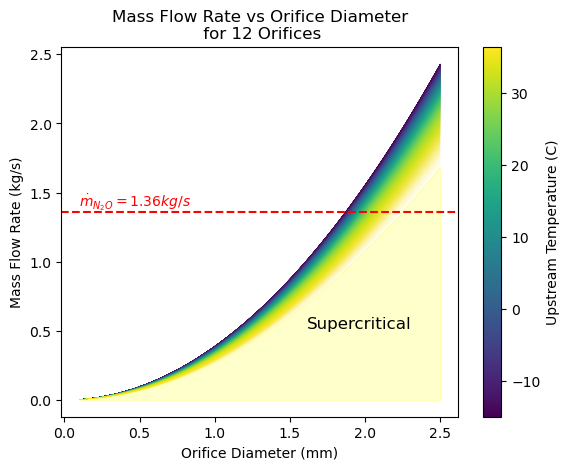

In [4]:
from SPICalcs import SPI_plot
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
# use bac
SPI_plot()
plt.show()

## 2. Homogeneous Equilibrium (HEM) Model 
The homogeneous equilibrium model assumes that the liquid and vapour phases are in thermal equilibrium at the injector exit. 

**key assumptions:**
* Liquid-vapor thermal equilibrium at the injector exit
* Isentropic flow across injector

Following these assumptions, the mass flow rate of the injector can be calculated as follows: 

$$
\dot{m} = C_{d} A \rho_{2} \sqrt{2(h_2-h_1)}\\
\\
s_1 = s_2
$$
    
where :
* $C_{d}$ is the discharge coefficient
* $A_{\rho_{2}}$ is the area of the injector orifice
* $h_1$ is the upstream enthalpy
* $h_2$ is the downstream enthalpy


For the sake of our feed system, we may assume the nitrous oxide at saturation at a specified temperature. This allows the upstream enthalpy and entropy to be found by:

$$
h_1 = h_{sat, l} \left(T_{1} \right) \\
s_1 = s \left( T_1, h_1 \right)
$$

The downstream enthalpy may be determined by the known chamber pressure and entropy:

$$
h_2 = h \left(P_{c}, s_2\right)
$$


Unlike the SPI model, the HEM model has a maxima at the point of point choked flow as shown in Figure 5. 

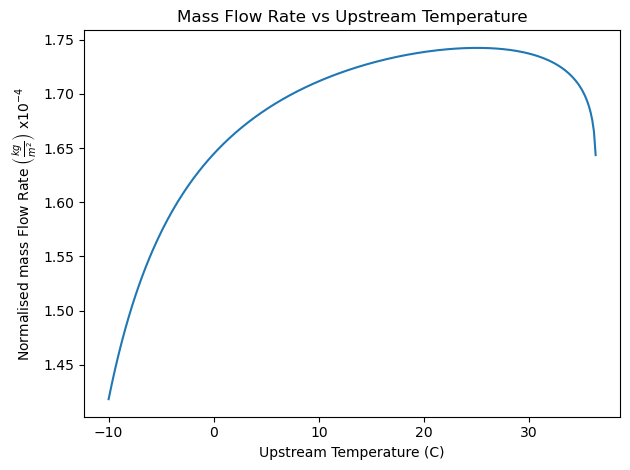

In [5]:
from HEMCalcs import NormalisedHEM
NormalisedHEM()

The mass flow resulting analogue of the curve is, as a result, slightly more ambiguous as shown below

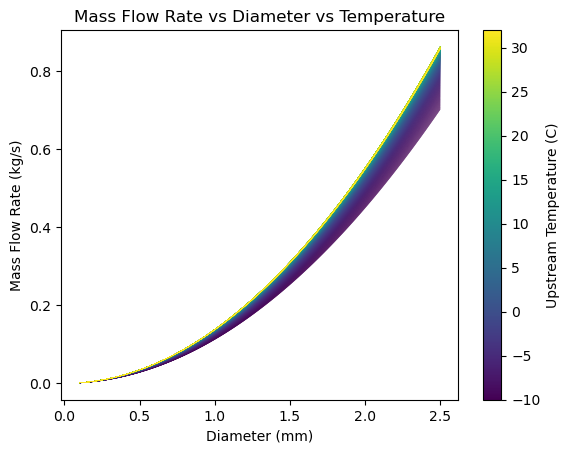

In [6]:
from HEMCalcs import HEMmassflowrate
HEMmassflowrate()

### Two-Phase Flow with Non-Equilibrium Effects
Dyer goes on to propose that non-equilibrium effects can be accounted for by:

1) **Super-heating of the liquid phase:** this occurs during expansion 
2) **Finite vapor bubble growth rates**

#### Characteristic Bubble Growth Rate, $\tau_r$
To account for the finite bubble growth rate, Dyer proposes a characteristic bubble growth rate, $\tau_b$ which is defined as:
$$
\tau_b \equiv \sqrt{ \frac{3}{2} 
\frac{\rho_{l}}{P_v - P_2}}
$$

where:
* $\rho_{l}$ is the liquid density
* $P_v$ is the vapour pressure
* $P_2$ is the downstream pressure

#### Fluid Residence Time, $\tau_r$
The fluid residence time is defined as the time it takes for the fluid to travel from the injector face to the downstream pressure. This is given by:

$$
\tau_r \equiv \frac{L}{u} = 
\frac{L}{\sqrt{ \frac{2 \Delta P}{\rho_{l} }}} =
L \sqrt{ \frac{\rho_{l}}{2 \Delta P}}
$$

where:
* $L$ is the injector length
* $u$ is the velocity of the fluid
* $\Delta P$ is the pressure drop across the injector

## 3. Non-Homogeneous Non-Equilibrium (NHNE) Model
Coined by Solomon, the NHNE model is a combination of the homogeneous equilibrium model and the two-phase flow with non-equilibrium effects. The NHNE model uses the non-equilibrium parameter, $\kappa$ to account for the non-equilibrium effects.


$$
\kappa = \sqrt{ \frac{P_1 - P_2}{P_v - P_2}} \propto \frac{\tau_r}{\tau_b}
$$

The mass flow rate can then be calculated as follows:

$$
\dot{m} = A \left(
\frac{\kappa}{1 + \kappa} \dot{m}_{SPI} +
\frac{1}{1 + \kappa} \dot{m}_{HEM}
\right)
$$

In [3]:
from NHNECalcs import NHNEPlot, NHNESliders
import ipywidgets as widgets
from IPython.display import display
T_slider, N_slider, kap_slider,  Cd_slider, Nom_slider= NHNESliders()
widgets.interactive(NHNEPlot, T=T_slider, N=N_slider, kap=kap_slider,
                    Cd = Cd_slider, Nom = Nom_slider)

interactive(children=(FloatSlider(value=30.0, continuous_update=False, description='T', max=32.0, min=-10.0, s…